In [1]:

import numpy as np
import pandas as pd
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import matplotlib.pyplot as plt
% matplotlib inline

In [2]:
sentence1= "hola a todos"
sentence2 = "hola mundo"
sentence3 = "hola a todo el mundo"
encoded1 = (10,1,15)
encoded2 = (10,15)
encoded3 = (10,12,1,15)
x = {"apple", "banana", "cherry"}
y = {"google", "microsoft", "apple"}

# set_1 = set([encoded1,encoded2,encoded3])
# set_2 = set([encoded1,encoded1,encoded1])
set_1 = set(sentence1.split())
set_2 = set(sentence2.split())

In [3]:

#Jaccard functions
def compare(a,b):
  if a == b :
    return True
  else:
    return False

def Intersection(set1,set2):
  inter =set1.intersection(set2)

  return len(inter)

def Union(set1,set2):
  un =set1.union(set2)
  return len(un)

def jaccard_distance(set1,set2):
  numerator = Intersection(set1,set2)
  denominator = Union(set1,set2)
  return numerator/denominator

def get_Novelty(dataset_1,dataset_2): #1 es mejor 0 es peor
  distances = []
  for i in dataset_1:
    set_i = set(i.split())
    dist_i=[]
    for j in dataset_2:
      set_j = set(j.split())
      dist_i.append(jaccard_distance(set_i,set_j))
      
    distances.append(1-np.max(dist_i))
  
  print(len(distances))
  print(np.mean(distances))
  # print(1-max(distances))
  

def get_Diversity(dataset_1): #1 es mejor 0 es peor
  distances = []
  for i in range(len(dataset_1)):
    set_i = set(dataset_1[i].split())
    dist_i=[]
    for j in range(len(dataset_1)):
      if i!=j:
        
        set_j = set(dataset_1[j].split())
        dist_i.append(jaccard_distance(set_i,set_j))
    distances.append(1-np.max(dist_i))
  print(np.mean(distances))
  # print(1-max(distances))
  


In [4]:
compare(sentence1,sentence2)
# compare(sentence1,sentence1)


False

In [ ]:
set_2

{'hola', 'mundo'}

In [ ]:
compare(encoded1,encoded2)

False

In [ ]:
compare(encoded1,encoded1)

True

In [ ]:
Union(set_1,set_2)

4

In [ ]:
Intersection(set_1,set_2)

1

In [ ]:
jaccard_distance(set_1,set_2)

0.25

In [5]:
from google.colab import drive
drive.mount('/content/gdrive')
%cd gdrive/My\ Drive/'Colab Notebooks'/'SentiGAN-persuasion'

Mounted at /content/gdrive
/content/gdrive/My Drive/Colab Notebooks/SentiGAN-persuasion


In [7]:
file_database_0='persuasion_corpus_v1.0/0.text'
file_database_3='persuasion_corpus_v1.0/3.text'
file_database_5='persuasion_corpus_v1.0/5.text'
file_database_4='persuasion_corpus_v1.0/4.text'
file_database={'Commitment':'persuasion_corpus_v1.0/3.text',
               'Liking':'persuasion_corpus_v1.0/5.text',
               'Consistency':'persuasion_corpus_v1.0/4.text'}
file_generated ={'Commitment':'Real_dataset/save_Persuasion/generated_samples_list_model3.txt',
                 'Liking':'Real_dataset/save_Persuasion/generated_samples_list_model5.txt',
                 'Consistency':'Real_dataset/save_Persuasion/generated_samples_list_model4.txt',}

In [8]:
generated_sentences = []
database_sentences = []
model='Liking'
# with open(file_database[model]) as f:
#     database_sentences = f.read().splitlines()
# print(len(database_sentences))

with open(file_database_0) as f:
    database_sentences = database_sentences + f.read().splitlines()
print(len(database_sentences))
with open(file_database_5) as f:
    database_sentences = database_sentences + f.read().splitlines()
print(len(database_sentences))

with open(file_generated[model]) as f:
    generated_sentences = f.read().splitlines()
print(len(generated_sentences))

60185
65537
500


In [9]:
get_Novelty(generated_sentences,database_sentences)
get_Diversity(generated_sentences)

500
0.30708241965509697
0.5620811043680969


*modelo 3 antes de extraccion*
500
0.35025245704206803
0.5007334696190027

In [18]:
#analisis de generados => quita palabras de una sola letra
one_word_list=[]
two_words_list=[]
generated_sentences_refined= []
for i in generated_sentences:
  # print(i)
  if len(i.split()) <= 5:
    one_word_list.append(i)
  else:
    generated_sentences_refined.append(i)
print(len(one_word_list))
print(one_word_list)

102
['yea go ahead', 'yea <ht01_first_name>', 'you', 'yea go ahead', 'okay', 'honey i been workin', 'slower <ht01_first_name> go ahead', '<ht01_first_name>', '<UNK>', '<UNK>', 'mm hm', 'yes', '<ht01_first_name>', 'it', 'hm', '<ht01_first_name>', 'huh', 'mm hm', 'alright', 'mm hm', 'ok bye bye <UNK>', '<pn60_first_name> to <ht01_first_name>', 'car is', 'to talk to your mom', '<ht01_first_name> please', 'peter tells us look', 'huh', 'mr <pn60>', 'huh', 'go ahead <pn60_first_name>', 'hmm', 'bye bye <UNK>', '<name> cant be located', 'and listen to', 'yes <ht01_first_name>', 'bye <UNK>', '<pn60_first_name> to captain <ch30_last_name>', 'go ahead <pn60_first_name>', 'is i want to', 'yea go ahead', '<pn60_first_name>', '<UNK>', 'yea go ahead', 'and the <UNK>', 'ya', 'yeah', 'wow', 'yeah ten <UNK> is plenty', 'yea go ahead', 'what', 'here let <hostage>', 'uh uh [laughs]', 'huh', 'nothin', 'ahead <pn60_first_name>', 'this is <pn60_first_name> to <ht01_first_name>', 'yea go ahead [pause]', 'hm',

In [ ]:
#novelty
#diversity
model 3 # Commitment 
0.796845460645436
0.5007334696190027

0.7972836131220384
0.6767923098831915

model 5 #Liking
0.7830562997024988
0.5620811043680969

0.7832246139042449
0.5915448557340925

model 4 #Consistency
0.7735283161632193
0.6474592920062885


In [13]:
get_Novelty(generated_sentences_refined,database_sentences)
get_Diversity(generated_sentences_refined)

436
0.3326633252925425
0.6080300684132082


In [ ]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator


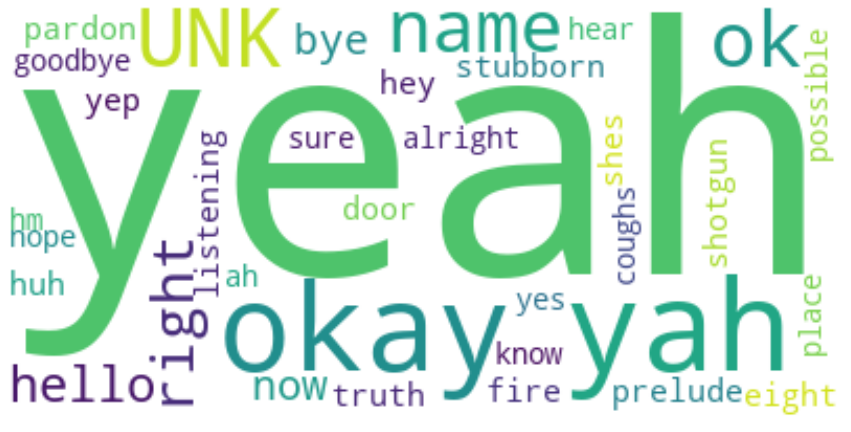

In [ ]:
def listToString(s):  
    
    # initialize an empty string 
    str1 = " " 
    
    # return string   
    return (str1.join(s)) 
          
lista = listToString(one_word_list)
wordcloud = WordCloud(max_font_size=200, max_words=100, background_color="white").generate(lista)
plt.figure(figsize=(15,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [ ]:
%pip install --upgrade firebase-admin
# %pip install  firebase-admin
# %pip install requests==1.1.0
# %pip install python-firebase



Requirement already up-to-date: firebase-admin in /usr/local/lib/python3.7/dist-packages (5.0.0)


In [ ]:
import firebase_admin
from firebase_admin import credentials, firestore, auth


cred = credentials.Certificate("Real_dataset/message-generation-firebase-adminsdk-o7l95-d2655c10e4.json")
firebase_admin.initialize_app(cred)


In [ ]:
db = firestore.client()

In [ ]:

docs = db.collection(u'users').stream()



for doc in docs:
    print(u'{} => {}'.format(doc.id, doc.to_dict()))



edson => {'password': 'cd4fbce046c46f107e45ae0ddd0db7d3', 'name': 'Edson Lipa', 'permissionType': 'Admin'}
mXxcMoKlbEAAN9WV4Cm0 => {'password': 'cd4fbce046c46f107e45ae0ddd0db7d3', 'username': 'edson'}


In [ ]:
new_doc = db.collection(u'Liking').document()

new_doc.set({'key': new_doc.id, 'menssage':"mensage de firestore"})

update_time {
  seconds: 1611585690
  nanos: 15357000
}

In [ ]:
def get_Novelty(dataset_1,dataset_2,dictio): #1 es mejor 0 es peor
  distances = []
  for i in dataset_1:
    set_i = set(i.split())
    dist_i=[]
    for j in dataset_2:
      set_j = set(j.split())
      dist_i.append(jaccard_distance(set_i,set_j))

    dictio[len(distances)]={'message':i,'novelty':1-np.max(dist_i),'order':len(distances)}
    distances.append(1-np.max(dist_i))
    
  print(len(distances))
  print(np.mean(distances))
  # print(1-max(distances))
  

def get_Diversity(dataset_1,dictio): #1 es mejor 0 es peor
  distances = []
  for i in range(len(dataset_1)):
    set_i = set(dataset_1[i].split())
    dist_i=[]
    for j in range(len(dataset_1)):
      if i!=j:
        
        set_j = set(dataset_1[j].split())
        dist_i.append(jaccard_distance(set_i,set_j))
    dictio[len(distances)]['diversity']=1-np.max(dist_i)
    distances.append(1-np.max(dist_i))
  print(np.mean(distances))
  # print(1-max(distances))

In [ ]:
dictio={}
get_Novelty(generated_sentences_refined,database_sentences,dictio)
print(dictio)
get_Diversity(generated_sentences_refined,dictio)

460
0.7750078938585115
{0: {'message': 'yea go ahead', 'novelty': 0.8461538461538461, 'order': 0}, 1: {'message': 'all to tell me i have decided that he can hear me obviously you listen to whats', 'novelty': 0.65, 'order': 1}, 2: {'message': 'yea <ht01_first_name>', 'novelty': 0.8888888888888888, 'order': 2}, 3: {'message': 'food is comin what happens you got a load of shit left and you cant send myself', 'novelty': 0.7692307692307692, 'order': 3}, 4: {'message': 'let me talk to my mother thats the last person you are doing all we gonna let', 'novelty': 0.76, 'order': 4}, 5: {'message': 'huh im not my year he love i was somebody with a pack of cigarettes lay by', 'novelty': 0.7307692307692308, 'order': 5}, 6: {'message': 'of the plane right now im between my pilot and co pilot im gonna let me walk', 'novelty': 0.75, 'order': 6}, 7: {'message': 'well i told you you could throw the gun in the plane lets face it you coulda', 'novelty': 0.75, 'order': 7}, 8: {'message': 'yea go ahead', 'no

In [ ]:
for i in dictio:
  #print(dictio[i])
  new_doc = db.collection(model).document()
  dictio[i]['id']=new_doc.id
  new_doc.set(dictio[i])